In [1]:
import pandas as pd
import numpy as np
import nltk, itertools

from gensim.models import Word2Vec
import nltk, os
import tensorflow as tf
import itertools
import random

In [2]:
file_data = open('gh_create_all_fields_cleaned_data.txt', 'rt')

In [3]:
sentences=file_data.read()

In [4]:
sentences=sentences.split('\n')

In [5]:
sentences

['abalone id sex length diameter height rings',
 'abalone sex length diameter height',
 'abbreviationoffsets id abbreviation offset types from to',
 'abc a b c d b family b family',
 'abc a b c family family',
 'abcd a b c d family family',
 'abc id country',
 'abookgroup groupname groupemail account id',
 'about id number name path',
 'about id title content img',
 'about id title keywords description',
 'about id title tag content',
 'abstractentity id creationdate modificationdate dtype',
 'aca id name created modified',
 'acceptableremoteaddress address createddatetime updateddatetime',
 'access aid mask type status',
 'accessartifact id bug branch',
 'accessdomain hash localid parent creator name',
 'accessfeatures id host commented feature',
 'access id issued token',
 'access id mask reason',
 'access id mask type reason',
 'access id source access type',
 'access id uid type action ip time',
 'accesskey accesskey value',
 'accesslog aid mask title path url hostname uid timestam

In [6]:
 out, inp = [" ".join(x.split()[1:]) for x in sentences], [" ".join(x.split()[:1]) for x in sentences]

In [7]:
len(out)

12639

In [8]:
text_doc = ''
for sent in out:
    text_doc+=sent+"\n"

In [9]:
def filter_words(sentence):
    ll = [[nltk.word_tokenize(w), ' '] for w in sentence.split()]
#     print(list(itertools.chain(*list(itertools.chain(*ll)))))
#     return [word.lower() if word.isalpha() else " " for word in [nltk.word_tokenize(sentence), " "]]
    return list(itertools.chain(*list(itertools.chain(*ll))))

def tokenize(text):
    return [filter_words(sentence) for sentence in nltk.sent_tokenize(text)]



In [10]:
chars = list(set(text_doc))
#create dictionary mapping for each char
char_to_ix = {ch:i for (i,ch) in enumerate(chars)}
ix_to_char = {i:ch for (i,ch) in enumerate(chars)}


lines = text_doc
sentences=lines.split('\n')

tokenized_words=[]
sent_data=[]
for sentence in sentences:
    sent_mod=''
    for char in sentence:
        sent_mod+=char+' ' 
#     print(sent_mod)
#     print(nltk.sent_tokenize(sent_mod))
    tokenized_words.extend(tokenize(sent_mod))
    sent_data.append(sentence)

word2vec_model = Word2Vec(tokenized_words, 
                          sg=1,  # here we will use skipgram 0 is for CBROW; skip gram is for smaller models 
                          size=10,
                          min_count=1 # word needs to occur atleast once
                         )

num_hiddens = 256
lr=0.1
seq_len=10

In [11]:
def get_params2(vocab_size, num_hidden):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return tf.random.normal(shape=shape,stddev=0.01,mean=0,dtype=tf.float32)

    # Hidden layer parameters
    E = tf.Variable(normal((vocab_size, 10)), dtype=tf.float32)
    W_xh = tf.Variable(normal((num_inputs, num_hiddens)), dtype=tf.float32)
    W_hh = tf.Variable(normal((num_hiddens, num_hiddens)), dtype=tf.float32)
    b_h = tf.Variable(tf.zeros(num_hiddens), dtype=tf.float32)
    # Output layer parameters
    W_hq = tf.Variable(normal((num_hiddens, num_outputs)), dtype=tf.float32)
    b_q = tf.Variable(tf.zeros(num_outputs), dtype=tf.float32)
    M = tf.Variable(tf.random.uniform([W_xh.shape[1], vocab_size], dtype=tf.float32))
    params = [W_xh, W_hh, b_h, W_hq, b_q, E, M]
    return params

In [12]:
def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return arg

In [14]:
updater = tf.keras.optimizers.SGD(lr)
# data_reader = DataReader("gh_create_all_fields_cleaned_data.txt", seq_len)
#defining the required params:
params = get_params2(len(chars), num_hiddens)
model=RNNModelScratch2(len(chars), num_hiddens, init_rnn_state2, rnn2, word2vec_model)
loss_res, loss_epochs=train(model, params, data_reader, sentences, char_to_ix, ix_to_char)



NameError: name 'RNNModelScratch2' is not defined

In [15]:
# Plotting the graph for characters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/Users/kedargn94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


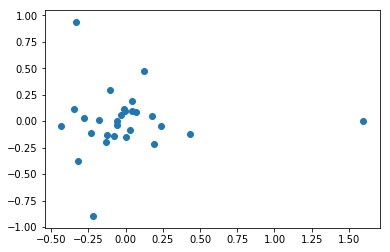

In [16]:
# Get the model from the file:
vocab = word2vec_model.wv.vocab

# instantiate the pca object
pca = PCA(n_components=2)

# Fit and transform the PCA object
pca_model = pca.fit_transform(word2vec_model[vocab])


# plot the data:
plt.scatter(pca_model[:,0], pca_model[:,1])

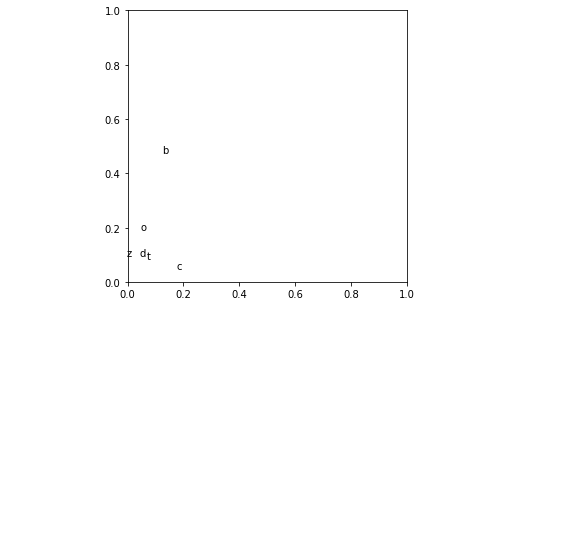

In [17]:
plt.figure(figsize=(5,5))

for i, word in enumerate(vocab):
    plt.annotate(word, xy=(pca_model[i, 0], pca_model[i, 1]))
    
plt.show()

In [18]:
len(vocab)

28

In [19]:
len(chars)

29

In [20]:
# making word tokenizations:

def filter_words(sentence):
    return [word for word in nltk.word_tokenize(sentence)]

def tokenize(text):
    return [filter_words(sentence) for sentence in nltk.sent_tokenize(text.lower())]


In [21]:
chars = list(set(text_doc))
#create dictionary mapping for each char
char_to_ix = {ch:i for (i,ch) in enumerate(chars)}
ix_to_char = {i:ch for (i,ch) in enumerate(chars)}


lines = text_doc
sentences=lines.split('\n')

tokenized_words=[]
sent_data=[]
for sentence in sentences:
    
    tokenized_words.extend(tokenize(sentence))
    sent_data.append(sentence)

word2vec_model = Word2Vec(tokenized_words, 
                          sg=1,  # here we will use skipgram 0 is for CBROW; skip gram is for smaller models 
                          size=10,
                          min_count=1 # word needs to occur atleast once
                         )

num_hiddens = 256
lr=0.1
seq_len=10

In [22]:
tokenized_words

[['id', 'sex', 'length', 'diameter', 'height', 'rings'],
 ['sex', 'length', 'diameter', 'height'],
 ['id', 'abbreviation', 'offset', 'types', 'from', 'to'],
 ['a', 'b', 'c', 'd', 'b', 'family', 'b', 'family'],
 ['a', 'b', 'c', 'family', 'family'],
 ['a', 'b', 'c', 'd', 'family', 'family'],
 ['id', 'country'],
 ['groupname', 'groupemail', 'account', 'id'],
 ['id', 'number', 'name', 'path'],
 ['id', 'title', 'content', 'img'],
 ['id', 'title', 'keywords', 'description'],
 ['id', 'title', 'tag', 'content'],
 ['id', 'creationdate', 'modificationdate', 'dtype'],
 ['id', 'name', 'created', 'modified'],
 ['address', 'createddatetime', 'updateddatetime'],
 ['aid', 'mask', 'type', 'status'],
 ['id', 'bug', 'branch'],
 ['hash', 'localid', 'parent', 'creator', 'name'],
 ['id', 'host', 'commented', 'feature'],
 ['id', 'issued', 'token'],
 ['id', 'mask', 'reason'],
 ['id', 'mask', 'type', 'reason'],
 ['id', 'source', 'access', 'type'],
 ['id', 'uid', 'type', 'action', 'ip', 'time'],
 ['accesskey', 

/Users/kedargn94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


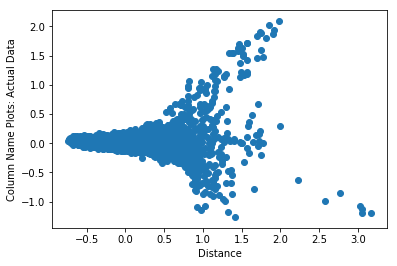

In [23]:
vocab = word2vec_model.wv.vocab

# instantiate the pca object
pca = PCA(n_components=2)

# Fit and transform the PCA object
pca_model = pca.fit_transform(word2vec_model[vocab])
plt.xlabel('Distance')
plt.ylabel('Column Name Plots: Actual Data')


# plot the data:
plt.scatter(pca_model[:,0], pca_model[:,1])

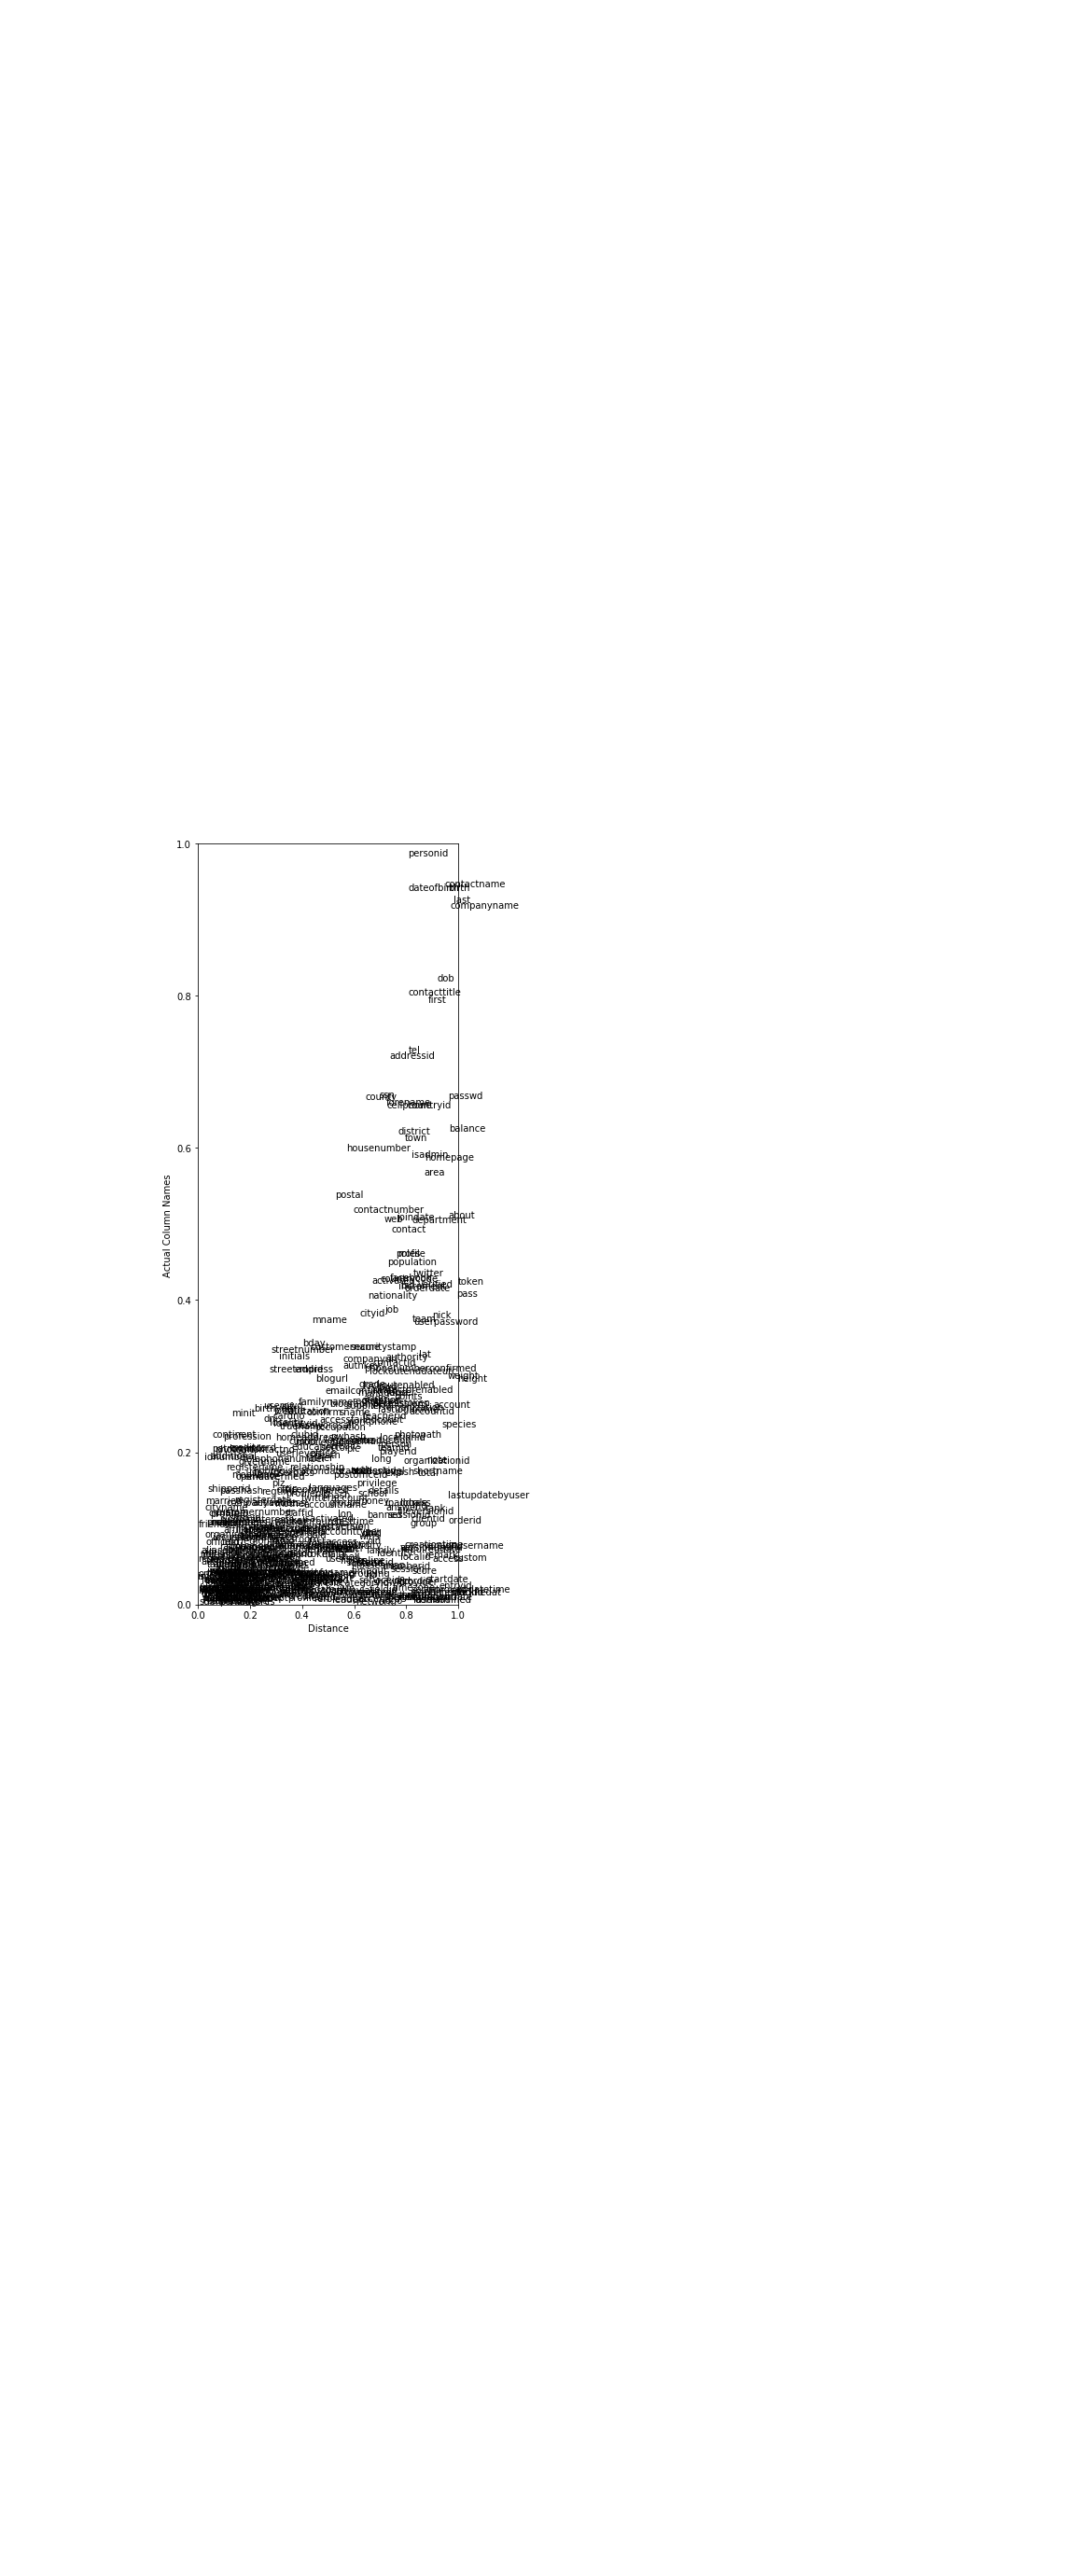

In [28]:
plt.figure(figsize=(5,15))

plt.xlabel('Distance')
plt.ylabel('Actual Column Names ')

for i, word in enumerate(vocab):
    plt.annotate(word, xy=(pca_model[i, 0], pca_model[i, 1]))
    
plt.show()

In [43]:
type(vocab)

dict